###### Грачев Дмитрий

###### Выриант 6.Индекс счастья
1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.
2. Постройте график счастья по регионам, страны на графике должны представляться отдельными точками.
3. Оцените количество счастья по годам по регионам.
4. Определите наиболее сильно изменяющиеся параметры по разным странам в разные годы.
5. Определите страны, появляющиеся и исчезающие в рейтинге стран.
6. Удалите строки с пропущенными значениями. Выведите размер набора данных до и после удаления.
7. Вычислите корреляцию Пирсона и Спирмена между признаками Trust.Government.Corruption и Family. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.
8. Добавьте в набор данных признак, являющийся суммой двух других признаков.


In [1]:
import pandas as pd
hp15 = pd.read_csv('2015.csv')
hp16 = pd.read_csv('2016.csv')
hp17 = pd.read_csv('2017.csv')
hp15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [2]:
hp16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [3]:
hp17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.

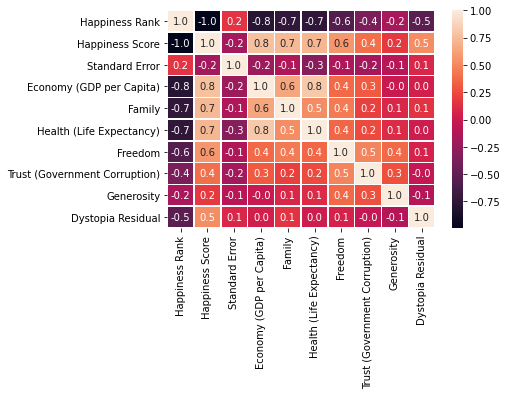

In [4]:
import seaborn as sb
%matplotlib inline
sb.heatmap(hp15.corr(), annot = True, fmt = '.1f', linewidths = .5)

Наблюдается большой уровень корреляции параметра "Happiness Score" с параметрами "Economy", "Family", "Health", а также "Economy" с "Health"

2. Постройте график счастья по регионам, страны на графике должны представляться отдельными точками.

In [5]:
happy = hp15[['Country'] + ['Region'] + ['Happiness Rank'] + ['Happiness Score']]
happy.head()

,Country,Region,Happiness Rank,Happiness Score
0,Switzerland,Western Europe,1,7.587
1,Iceland,Western Europe,2,7.561
2,Denmark,Western Europe,3,7.527
3,Norway,Western Europe,4,7.522
4,Canada,North America,5,7.427


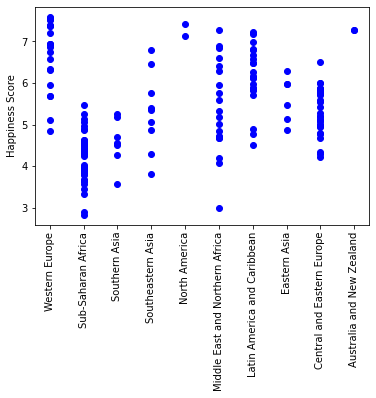

In [6]:
import matplotlib.pyplot as plt
data = pd.DataFrame(happy.sort_values(by='Region', ascending=False))
data = data.reset_index(drop=True)
plt.ylabel('Happiness Score')
x = 0
region = data['Region'][0]
X = [0]
labels = [data['Region'][0]]
for i in range(0, happy.last_valid_index()+1):
    if region is not data['Region'][i]:
        labels.append(data['Region'][i])
        region = data['Region'][i]
        x = x + 1
        X.append(x)
    plt.plot(x, data['Happiness Score'][i], 'bo')
plt.xticks(X, labels, rotation='vertical')
plt.show()

3. Оцените количество счастья по годам по регионам.

In [7]:
hp15_ = hp15.loc[:, ('Country', 'Region')]
hp16_ = hp16.loc[:, ('Country', 'Region')]
hp15_16 = hp15_.merge(hp16_, how='outer')
hp17_ = hp17.merge(hp15_16, on='Country')
pd.DataFrame({
    '2015': hp15.groupby(['Region'])['Happiness Score'].mean(),
    '2016': hp16.groupby(['Region'])['Happiness Score'].mean(),
    '2017': hp17_.groupby(['Region'])['Happiness.Score'].mean(),
})

,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.496500
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


4. Определите наиболее сильно изменяющиеся параметры по разным странам в разные годы.

In [8]:
def changes(df, lb):
    ch = df.std() / df.mean()
    print('\n{}\n{}'.format(lb, ch.sort_values()[::-1]))

all = pd.concat([hp15, hp16, hp17])

changes(hp15, '2015')
changes(hp16, '2016')
changes(hp17, '2017')
changes(all, 'All')


2015
Trust (Government Corruption)    0.836930
Happiness Rank                   0.575572
Generosity                       0.533870
Economy (GDP per Capita)         0.476425
Health (Life Expectancy)         0.392026
Standard Error                   0.358072
Freedom                          0.351581
Family                           0.274830
Dystopia Residual                0.263724
Happiness Score                  0.212996
dtype: float64

2016
Trust (Government Corruption)    0.806822
Happiness Rank                   0.575659
Generosity                       0.551263
Economy (GDP per Capita)         0.432544
Health (Life Expectancy)         0.411301
Freedom                          0.392208
Family                           0.336062
Dystopia Residual                0.233132
Lower Confidence Interval        0.217334
Happiness Score                  0.212121
Upper Confidence Interval        0.207315
dtype: float64

2017
Trust..Government.Corruption.    0.825702
Happiness.Rank              

5. Определите страны, появляющиеся и исчезающие в рейтинге стран.

In [9]:
def diff(df1, df2):
    d = pd.merge(df1, df2, how='outer', indicator=True, on='Country')
    return d[d['_merge'] != 'both']

hp15_16 = diff(hp15, hp16)
hp15_17 = diff(hp15, hp17)
hp16_17 = diff(hp16, hp17)

hp_diff = pd.merge(pd.merge(hp15_16, hp15_17, how='outer'), hp16_17, how='outer')
hp_diff = hp_diff['Country'].drop_duplicates()
hp_diff

0                         Oman
1            Somaliland region
2                   Mozambique
3                      Lesotho
4                    Swaziland
5                     Djibouti
6     Central African Republic
7                  Puerto Rico
8                       Belize
9                      Somalia
10           Somaliland Region
11                     Namibia
12                 South Sudan
13                      Taiwan
14                    Suriname
15                   Hong Kong
16                        Laos
17                     Comoros
18    Taiwan Province of China
20     Hong Kong S.A.R., China
Name: Country, dtype: object

6. Удалите строки с пропущенными значениями. Выведите размер набора данных до и после удаления.

In [10]:
befor = hp15.last_valid_index() + 1

hp15_ = hp15[hp15[:] != 'Nan']
hp15_.reset_index()

after = hp15_.last_valid_index() + 1

print('befor: {}\nafter: {}\n{}'.format(befor, after, hp15_))
hp15_[hp15_.index == 165]

befor: 158
after: 158
         Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   

d:\python 3.7.3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


7. Вычислите корреляцию Пирсона и Спирмена между признаками Trust.Government.Corruption и Family. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

Spearman p-value: 0.011338926895523417
Pearson p-value: 0.0036996764406810015


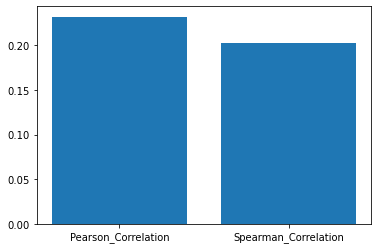

In [11]:
import scipy
p_corr, p_pval = scipy.stats.pearsonr(hp17['Trust..Government.Corruption.'], hp17['Family'])
s_corr, s_pval = scipy.stats.spearmanr(hp17['Trust..Government.Corruption.'], hp17['Family'])

labels = ('Pearson_Correlation', 'Spearman_Correlation')
plt.bar(range(2), [p_corr, s_corr], tick_label=labels)

print('Spearman p-value: {}\nPearson p-value: {}'.format(s_pval, p_pval))

8. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [12]:
hp17['Whisker.summ'] = hp17['Whisker.high'] + hp17['Whisker.low']
hp17

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Whisker.summ
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,15.074
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,15.044
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,15.008
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,14.988
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,14.938
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,6.942
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,6.924
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,6.698
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,5.810
